# K-D tree fundamentals

TODO: what is a K-D tree

TODO: what libraries are used?

In [4]:
import numpy as np
import teqpflsh
import matplotlib.pyplot as plt

def xy2poly(*, X, Y):
    seq1 = teqpflsh.CoordinateSequence()
    for i in range(len(X)):
        seq1.add(X[i], Y[i])
    seq1.closeRing(True)
    return ptr.createPolygon(seq1)

def boxpoly(*, top, bottom, left, right):
    X = [left, right, right, left, left]
    Y = [bottom, bottom, top, top, bottom]
    return xy2poly(X=X, Y=Y)

def coords2list(coords):
    X, Y = [], []
    for j in range(coords.getSize()):
        X.append(coords.getX(j))
        Y.append(coords.getY(j))
    return np.array(X), np.array(Y)

In [22]:
ptr = teqpflsh.GeometryFactoryHolder()

# Polygon for the shifted circle
seq1 = teqpflsh.CoordinateSequence()
t = np.linspace(0, 2*np.pi, 10000)
X = 0.5 + 0.3*np.cos(t)
Y = 0.3*np.sin(t)
for i in range(len(t)):
    seq1.add(X[i], Y[i])
seq1.closeRing(True)
poly1 = ptr.createPolygon(seq1)
poly2 = boxpoly(left=0, right=1, bottom=0, top=1)

# Polygon for the square [0,1]x[0,1] minus small circle
poly = poly2.difference(poly1)
X, Y = coords2list(poly.getCoordinates())

def do_one(*, NKD, Nsample, plot=False, close=True):
    def get_random(N):
        """ Random points for the tree """
        XX, YY = [], []
        for i in range(N*10):
            x_, y_ = np.random.random(2)
            pt = ptr.createPoint(float(x_), float(y_))
            if poly.containsPoint(pt):
                XX.append(x_)
                YY.append(y_)
                if len(XX) == N:
                    break
        return XX, YY
    XX, YY = get_random(NKD)
    
    if plot:
        plt.plot(X, Y, 'k')
        plt.plot(XX, YY, '.', ms=5)

    holder = teqpflsh.L2TreeHolder(np.array(XX), np.array(YY), 10)
    tree = holder.tree

    xsample, ysample = get_random(Nsample)
    d2 = [tree.get_nearest_indexd2(x_, y_)[1] for x_, y_ in zip(xsample, ysample)]
    
    if plot:
        plt.axis('off')
        plt.axis('equal');
    if close:
        plt.close()
    
    return np.mean(np.array(d2)**0.5)

np.float64(0.12932557026119965)

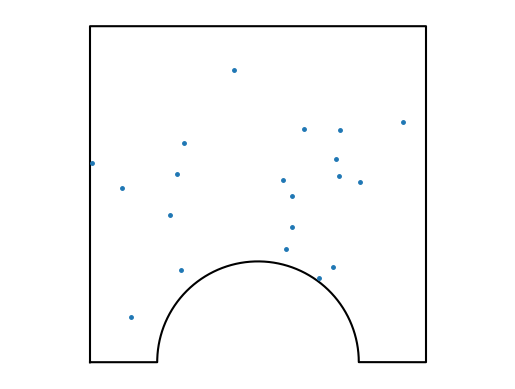

In [23]:
do_one(NKD=20, Nsample=100, plot=True, close=False)

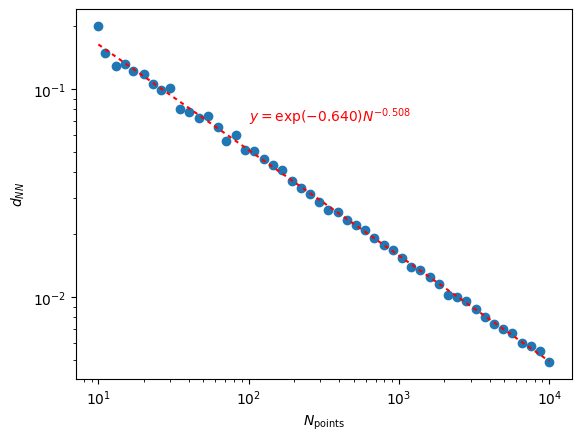

In [24]:
Ntrees = np.geomspace(10, 10**4, dtype=int)
d2s = [do_one(NKD=NKD_, Nsample=10**3) for NKD_ in Ntrees]
plt.plot(Ntrees, d2s, 'o')

pf = np.polyfit(np.log(Ntrees), np.log(d2s), 1)
xx = np.geomspace(np.min(Ntrees), np.max(Ntrees), 1000)
plt.plot(xx, np.exp(np.polyval(pf, np.log(xx))), dashes=[2,2], color='r')
plt.text(100, 0.07, rf'$y=\exp({pf[1]:0.3f})N^{{{pf[0]:0.3f}}}$', color='r')
    
plt.xscale('log')
plt.yscale('log')
plt.gca().set(xlabel=r'$N_{\rm points}$', ylabel=r'$d_{NN}$');

# del ptr